# What is the Fate of Marvel Characters? (Predicting their Survival with their Traits using Classification Methods) by Taehyung Kim

## Part 1: Project Background

#### As a fan of the Marvel Cinematic Universe, I always found the scenes where each character met their fate so dramatic. Having learned classification algorithms, I thought I'd be interesting to implement these methods to predict which characters live and which meet their demise, using some of their characteristics.  

## Part 2: Data Cleaning

In [61]:
# Load Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Import Data
df = pd.read_csv("marvel-wikia-data.csv")

# Observing the First 5 Rows
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [36]:
print(df.shape) # observing the number of (rows, columns)

(16376, 13)


In [37]:
print(df.columns.values) # oberserving the unique columns of the dataset

['page_id' 'name' 'urlslug' 'ID' 'ALIGN' 'EYE' 'HAIR' 'SEX' 'GSM' 'ALIVE'
 'APPEARANCES' 'FIRST APPEARANCE' 'Year']


In [38]:
df = df[['name', 'ID', 'ALIGN', 'EYE', 'HAIR', 'ALIVE', 'APPEARANCES' ]]  # choosing the columns of interest

df.isnull().sum() # counting missing values per column

name              0
ID             3770
ALIGN          2812
EYE            9767
HAIR           4264
ALIVE             3
APPEARANCES    1096
dtype: int64

In [39]:
df = df.dropna(subset=['ALIVE'])  # dropping observations with missing ALIVE value (only three observations)

df = df.fillna(df.mean()) # replacing empty APPEARANCES values with mean (= df.mean())

# list of unique values per column
print("ID:", df.ID.unique())
print("ALIGN:", df.ALIGN.unique())
print("EYE:", df.EYE.unique())
print("HAIR:", df.HAIR.unique())

ID: ['Secret Identity' 'Public Identity' 'No Dual Identity'
 'Known to Authorities Identity' nan]
ALIGN: ['Good Characters' 'Neutral Characters' 'Bad Characters' nan]
EYE: ['Hazel Eyes' 'Blue Eyes' 'Brown Eyes' 'Green Eyes' 'Grey Eyes'
 'Yellow Eyes' 'Gold Eyes' 'Red Eyes' 'Black Eyeballs' 'Amber Eyes'
 'Variable Eyes' nan 'Black Eyes' 'White Eyes' 'Orange Eyes' 'Silver Eyes'
 'Purple Eyes' 'Pink Eyes' 'One Eye' 'Violet Eyes' 'Multiple Eyes'
 'Magenta Eyes' 'Yellow Eyeballs' 'No Eyes' 'Compound Eyes']
HAIR: ['Brown Hair' 'White Hair' 'Black Hair' 'Blond Hair' 'No Hair' 'Blue Hair'
 'Red Hair' 'Bald' 'Auburn Hair' 'Grey Hair' 'Silver Hair' 'Purple Hair'
 'Strawberry Blond Hair' 'Green Hair' 'Reddish Blond Hair' 'Gold Hair' nan
 'Orange Hair' 'Pink Hair' 'Variable Hair' 'Yellow Hair'
 'Light Brown Hair' 'Magenta Hair' 'Bronze Hair' 'Dyed Hair'
 'Orange-brown Hair']


In [40]:
df = df.dropna() # After deep consideration, I've decided to drop observations with missing values. Although I was able
# to replace missing APPEARANCES values with its column mean, the other columns had unique qualitative variables that weren't
# too clear on what to be replaced with. 

print(df.isnull().sum()) # checking missing values in the final dataset
print(df.shape) # rows, columns of the final dataset
df # observing the final dataset

name           0
ID             0
ALIGN          0
EYE            0
HAIR           0
ALIVE          0
APPEARANCES    0
dtype: int64
(5014, 7)


,name,ID,ALIGN,EYE,HAIR,ALIVE,APPEARANCES
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Living Characters,4043.000000
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Living Characters,3360.000000
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Living Characters,3061.000000
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Living Characters,2961.000000
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Living Characters,2258.000000
...,...,...,...,...,...,...,...
16367,Marcus (Kate Bishop's neighbor) (Earth-616),Public Identity,Good Characters,Hazel Eyes,Bald,Living Characters,17.033377
16369,Melanie Kapoor (Earth-616),Public Identity,Good Characters,Blue Eyes,Black Hair,Living Characters,17.033377
16371,Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Living Characters,17.033377
16372,Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Living Characters,17.033377


## Part 3: Exploratory Data Analysis

Text(0.5, 1.0, 'Living vs Deceased')

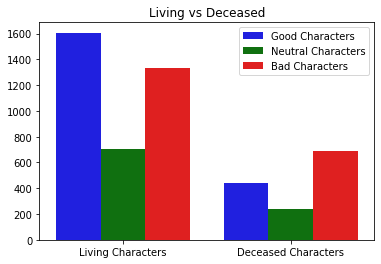

In [41]:
# Observing number of living vs deceased characters by their alignments (grouped bar plot)

axs = sns.countplot(x = "ALIVE", hue = "ALIGN", data = df, palette = ["blue", "green", "red"])
plt.xlabel("")
plt.ylabel("")
plt.legend(title = "")
plt.title("Living vs Deceased")

ALIVE
Deceased Characters     33189.969241
Living Characters      176132.974476
Name: APPEARANCES, dtype: float64


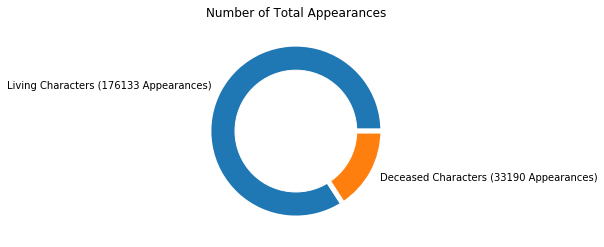

In [42]:
# Creating a doughnut plot with wedges to compare Living vs Deceased characters' # of appearances

print(df.groupby('ALIVE')['APPEARANCES'].sum()) # counting the number of appearances per deceased & living characters

names='Living Characters (176133 Appearances)', 'Deceased Characters (33190 Appearances)' # naming each variable
size=[176133, 33190]  # creating size for each variable
my_circle=plt.Circle( (0,0), 0.7, color='white') # creating the empty circle in the middle of the doughnut chart
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }) # creating wedges between the variables
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Number of Total Appearances")
plt.show()

Text(0.5, 1.0, 'Characters by Alignment')

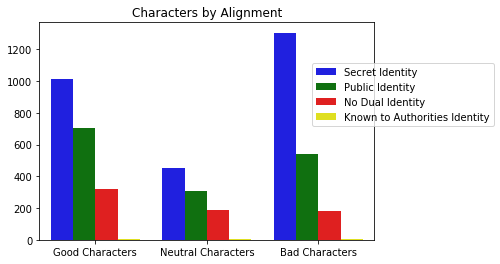

In [43]:
# Creating a grouped barplot to observed the number of characters by alignment and identity

axs = sns.countplot(x = "ALIGN", hue = "ID", data = df, palette = ["blue", "green", "red", "yellow"])
plt.xlabel("")
plt.ylabel("")
plt.legend(title = "", bbox_to_anchor=(0.8, 0.5))
plt.title("Characters by Alignment")

## Part 4: Model Building and Evaluation

In [44]:
# Label Encoding the Dependent Variable, ALIVE (Living vs Deceased)

le = LabelEncoder()
df['ALIVE'] = le.fit_transform(df['ALIVE']) # Now, Living Characters = 1 and Deceased Characters = 0

# One-Hot Encoding the Independent Variables - ID, ALIGN, EYE, HAIR (after dropping the name variable)

df = df.drop(['name'], axis = 1) # drop the 'name' variable

df = pd.get_dummies(df) # One-Hot Encoding using pandas get_dummies (categorical->dummy variables) 

df # display data

,ALIVE,APPEARANCES,ID_Known to Authorities Identity,ID_No Dual Identity,ID_Public Identity,ID_Secret Identity,ALIGN_Bad Characters,ALIGN_Good Characters,ALIGN_Neutral Characters,EYE_Amber Eyes,...,HAIR_Orange Hair,HAIR_Pink Hair,HAIR_Purple Hair,HAIR_Red Hair,HAIR_Reddish Blond Hair,HAIR_Silver Hair,HAIR_Strawberry Blond Hair,HAIR_Variable Hair,HAIR_White Hair,HAIR_Yellow Hair
0,1,4043.000000,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3360.000000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,3061.000000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2961.000000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2258.000000,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16367,1,17.033377,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16369,1,17.033377,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16371,1,17.033377,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16372,1,17.033377,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Defining the Dependent Variable (Y) and Independent Variables (X) 

Y = df["ALIVE"]
X = df.drop(["ALIVE"], axis = 1)

# Test/Train Split (20/80 Split)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Part 4-1: Logistic Regression

In [47]:
# Logistic Regression

model = LogisticRegression(max_iter = 400) # build model (max_iter set to 400 due to error)
LR = model.fit(X_train, Y_train) # fit training data into the model

Y_pred = LR.predict(X_test) # creating predicted Y values
print(confusion_matrix(Y_test, Y_pred, labels = [1,0])) # building a confusion matrix
print(accuracy_score(Y_test, Y_pred)) # print accuracy score using train/test method

# Cross Validation with K = 5 folds 

accuracy = cross_val_score(model, X, Y, scoring = 'accuracy', cv = 5) # get accuracy scores for k = 5 fold CV

print(accuracy.mean()) # print accuarcy mean of k = 5 fold CV method

[[728   2]
 [272   1]]
0.7268195413758723
0.7229753852215807


### Part 4-2: QDA

In [50]:
# Quadratic Discriminant Analysis (QDA)- (had colinearity issue)

model = QuadraticDiscriminantAnalysis() # build QDA model
QDA = model.fit(X_train, Y_train) # fit model

Y_pred = QDA.predict(X_test) # predict 
print(confusion_matrix(Y_test, Y_pred, labels = [1,0])) # print confusion matrix
print(accuracy_score(Y_test, Y_pred)) # print accuracy score of train/test method

# Cross Validation with K = 5 folds 

accuracy = cross_val_score(model, X, Y, scoring = 'accuracy', cv = 5) # get accuracy scores for k = 5 fold CV

print(accuracy.mean()) # print accuarcy mean of k = 5 fold CV method

[[ 21 709]
 [  7 266]]
0.28614157527417744
0.44691613781410267


### Part 4-3: LDA

In [51]:
# Linear Discriminant Analysis (LDA)

model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, Y_pred, labels = [1,0]))
print(accuracy_score(Y_test, Y_pred))

# Cross Validation with K = 5 folds 

accuracy = cross_val_score(model, X, Y, scoring = 'accuracy', cv = 5) # get accuracy scores for k = 5 fold CV

print(accuracy.mean()) # print accuarcy mean of k = 5 fold CV method

[[721   9]
 [271   2]]
0.7208374875373879
0.7205819666748258


### Part 4-4: KNN

In [60]:
# K-Nearest Neighbors (KNN) (used k value = 64)
# Here, I used k = sqrt(N), N = observations in training set
# https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 64)
neigh.fit(X_train, Y_train)

Y_pred = neigh.predict(X_test)
print(confusion_matrix(Y_test, Y_pred, labels = [1,0]))
print(accuracy_score(Y_test, Y_pred))

# Cross Validation with K = 5 folds 

accuracy = cross_val_score(neigh, X, Y, scoring = 'accuracy', cv = 5) # get accuracy scores for k = 5 fold CV

print(accuracy.mean()) # print accuarcy mean of k = 5 fold CV method

[[730   0]
 [273   0]]
0.7278165503489531
0.6946613254050225


### Part 4-5: Random Forest

In [65]:
# Random Forest

rfr = RandomForestClassifier(random_state = 42)

parameters = {'n_estimators':[10, 100, 150, 200, 300]}

CV_rfr = GridSearchCV(rfr, parameters, scoring = 'accuracy', cv = 10)

CV_rfr.fit(X_train, Y_train)

print("Best number of trees(based on training data):", CV_rfr.best_params_)

clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred, labels = [1,0]))
print(accuracy_score(Y_test, Y_pred))

# Cross Validation with K = 5 folds 

rfr = RandomForestClassifier(random_state = 42)

parameters = {'n_estimators':[10, 100, 150, 200, 300]}

CV_rfr = GridSearchCV(rfr, parameters, scoring = 'accuracy', cv = 10)

CV_rfr.fit(X, Y)

print("Best number of trees(based on whole data):", CV_rfr.best_params_)

clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

accuracy = cross_val_score(clf, X, Y, scoring = 'accuracy', cv = 5) # get accuracy scores for k = 5 fold CV

print(accuracy.mean()) # print accuarcy mean of k = 5 fold CV method

Best number of trees(based on training data): {'n_estimators': 100}
[[591 139]
 [201  72]]
0.6610169491525424
Best number of trees(based on whole data): {'n_estimators': 100}
0.6537680372057479


### Part 4-6: Model Comparison

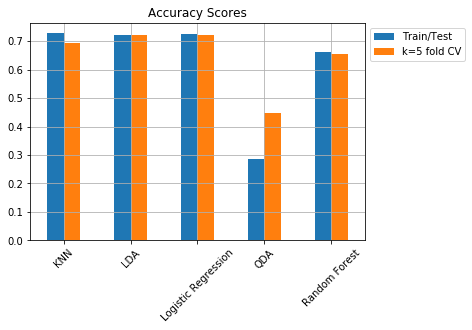

In [66]:
# Accuracy Scores- Rounded to the fourth decimal-Based on Train/Test data split method, KNN(k = 64) had the highest 
# accuracy score. 
# Based on k = 5 fold CV method, Logistic Regression had the highest accuracy score
data = {'Model Name': ['Logistic Regression', 'Logistic Regression','QDA', 'QDA', 'LDA', 'LDA', 'KNN', 'KNN',
                       'Random Forest', 'Random Forest'],
        'Accuracy': [0.7268, 0.7230, 0.2861, 0.4469, 0.7208, 0.7206, 0.7278, 0.6947, 0.6610, 0.6537],
       'Type': ['Train/Test', 'k=5 fold CV', 'Train/Test', 'k=5 fold CV', 'Train/Test', 'k=5 fold CV', 'Train/Test', 
                'k=5 fold CV', 'Train/Test', 'k=5 fold CV']}

df = pd.DataFrame(data, columns = ['Model Name', 'Accuracy', 'Type'])

df.pivot("Model Name", "Type", "Accuracy").plot(kind='bar')

plt.xlabel("")
plt.legend(title = "", bbox_to_anchor = (1,1))
plt.xticks(rotation=45)
plt.title("Accuracy Scores")
plt.grid()
plt.show()

In [158]:
# BONUS!!!
# Let's say that there's a Marvel character with the following traits-
# Name:Peter Griffin, ID:Secret Identity, ALIGN: Good Characters, EYE:Blue Eyes, HAIR:White Hair, ALIVE:(EMPTY), APPEARANCES:2000
# If we want to predict whether this character lives or dies (predicting the ALIVE variable), we can:
# 1. Add new row of this character 2. encode its variables 3. fit into the logistic regression

df = pd.read_csv("marvel-wikia-data.csv")
df = df[['name', 'ID', 'ALIGN', 'EYE', 'HAIR', 'ALIVE', 'APPEARANCES' ]]
df = df.dropna(subset=['ALIVE'])  
df = df.fillna(df.mean()) 
df = df.dropna()

new_row = {'name':'Peter Griffin', 'ID':'Secret Identity', 'ALIGN':'Good Characters', 'EYE':'Blue Eyes', 'HAIR':'Brown Hair', 'APPEARANCES':'2000'}
df = df.append(new_row, ignore_index=True)

X = df[['ID', 'ALIGN', 'EYE', 'HAIR', 'APPEARANCES']]

X = pd.get_dummies(X, columns = ['ID', 'ALIGN', 'EYE', 'HAIR'])

df['ALIVE'] = LR.predict(X)

df 
# He lives!!! (1=lives, 0=dies)

,name,ID,ALIGN,EYE,HAIR,ALIVE,APPEARANCES
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,1,4043
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,1,3360
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,1,3061
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,1,2961
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,1,2258
...,...,...,...,...,...,...,...
5010,Melanie Kapoor (Earth-616),Public Identity,Good Characters,Blue Eyes,Black Hair,1,17.0334
5011,Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,1,17.0334
5012,Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,1,17.0334
5013,Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,1,17.0334


## Part 5: Conclusion and Things that I've Learned (including limitations)

#### Only to name a few...
#### - It isn't easy predicting exactly which character survives and who doesn't!!! (limiations include - missingness of data, date of data created, etc.)
#### - One Hot Encoding and Label Encoding can be used to convert categorical variables to numerical ones
#### - Interestingly, cross validation did not result in higher accuracy scores for some models
#### - Different ways to look at missing data
#### - Different classification techniques (KNN, LDA, Logistic Regression, QDA, Random Forest)

## Part 6: Resources that I've Used

#### https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset?select=marvel-wikia-data.csv -> dataset
#### https://pandas.pydata.org/pandas-docs/stable/reference/index.html ->data manipulation and analysis with pandas (& LOTS of googling)
#### https://seaborn.pydata.org/generated/seaborn.countplot.html -> sns grouped countplot
#### https://python-graph-gallery.com/161-custom-matplotlib-donut-plot/ -> wedged donut plot
#### https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html -> changing legend location
#### https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd -> label encoding and one hot encoding
#### https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 ->further on encoding
#### https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 -> different methods of evaluating classification models
#### https://scikit-learn.org/stable/modules/model_evaluation.html -> different scoring parameters in sci-kit learn
#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score -> cross_val_score
#### (not used in this project, but still useful - negative MSE values in cross validation scoring) https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
#### (not used in this project, but still useful- cross_val_predict 1) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
#### (not used in this project, but still useful- cross_val_predict 2) https://stackoverflow.com/questions/43613443/difference-between-cross-val-score-and-cross-val-predict
#### (not used in this project, but still useful- cross_val_predict 3) https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated
#### https://stackoverflow.com/questions/47796264/function-to-create-grouped-bar-plot ->grouped bar plot using pivot
#### https://pythonexamples.org/pandas-dataframe-add-append-row/ -> add new row in pandas